In [1]:
 %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy import sqrt,sin, cos, pi,tan

In [2]:
from qutip import *

# Energy levels for H

Energy for H in a case that n=1 
$$
\hat{H}^{(n)} = (n-\frac{1}{2})\omega_c \mathbb{1} + \sqrt{\frac{\Delta^2_{ac}}{4}+ng^2_{ac}} \sigma_z^{(n)}
- g_{cm}(n-\frac{1}{2})(\hat{b}+\hat{b}^\dagger) -  \frac{1}{2} \tilde{g}_{pm} \Big [ sin\phi^{(n)} \sigma_x^{(n)}+ cos\phi^{(n)}\sigma_z^{(n)}\Big ]
(\hat{b}+\hat{b}^\dagger) + \omega_m \hat{b}^\dagger \hat{b}
$$

Lets write this hamiltonian in the form od Generelized Rabi
$$
\large {
\hat{H}_{GR}= \omega \hat{b}^\dagger \hat{b}+ g \hat{\sigma}_x (\hat{b}+ \hat{b}^\dagger) + \epsilon \sigma_x + \Delta \sigma_z
}
$$


by defining these expressions
$
g=- \dfrac{1}{2} \tilde{g}_{pm}~,~~~~~~~~~ \Delta= \sqrt{\dfrac{\Delta^2_{ac}}{4}+ng^2_{ac}}~~sin(\phi) 
~,~~~~~~~~~  \epsilon= \sqrt{\dfrac{\Delta^2_{ac}}{4}+ng^2_{ac}}~~cos(\phi)+ \dfrac{g_{cm}{g}_{pm}}{\omega_m}(n-\dfrac{1}{2})
$

In [31]:

def Energy_compute(Nm, theta, g_ac, g_am, g_cm, delta_ac, omega, n, g_list):
    Nc = 12     # cavity photon number

    wm= omega
    wc = 100 *wm
    wa= delta_ac + wc
    #wa=wc                  # resonance
   
    #a = tensor(qeye(Nm),destroy(Nc), qeye(2))     # cavity anihilation operator
    b = tensor(destroy(Nm), qeye(2))      # phonon anihilation opr

    sigma_z = tensor(qeye(Nm), sigmaz())
    sigma_x = tensor(qeye(Nm), sigmax())

    I = tensor(identity(Nm), identity(2))
   #######careful    basis(2,1) is ground state?!  Sakurai pg. 23
   #============== in the rotated frame

   ##careful! when we go to pauli rotating frame a (theta-pi/2) substitution is done too
   # as consecuence e.g. tan(theta)---->-cot(theta) and sin(theta)----> -cos(theta)
    newsigma_z =   sigma_x * sin(theta) + sigma_z * cos(theta)
    newsigma_x = - sigma_x * cos(theta) + sigma_z * sin(theta)
####whai if both n and delta+ac eual to zero?!

    evals_mt = np.zeros((len(g_list), Nm*2))
    
    idx=0
    for g in g_list:
        
    
        # almost a_0 is almost constant and only shifts energy origin
        # g_cm=2(g_am-g)
        
        a_0 = (n-1/2)*wc - (1/wm)*(2*(n-1/2)*(g_am-g))**2
        # displaced creation and annihilation oprs
        q_0 = (n-1/2)*sqrt(2)*2*(g_am-g)/omega
        b_n = b - q_0/sqrt(2)
    
        # condition for n=0    .... since for n=0 cos or sin is undefined!
        if n !=0:    

            epsilon = sqrt(n*(g_ac**2) + (delta_ac**2)/4) * cos(theta) + 2*(g_am-g) * (-2*g) * (n-1/2)/omega
            # g_pol= -2g      ,,, g_pol= g_cm-2g_am => g_cm = g_pol + 2g_am => g_cm=2(g_am-g)
            delta   = sqrt(n*(g_ac**2) + (delta_ac**2)/4) * sin(theta)
        else:
            epsilon = cos(theta) * delta_ac/2.0 + 2*(g_am-g) * (-2*g) * (-1/2)/omega
            delta   = 0.0          

        H = a_0*I+ omega * b_n.dag() * b_n + g * newsigma_x * (b_n+ b_n.dag())  + epsilon * newsigma_x + delta * newsigma_z
    
        evals, ekets = H.eigenstates()
        #evals = H.eigenenergies()
        evals_mt[idx,:]=np.real(evals)
    
        idx +=1
    return evals_mt


In [32]:
Nm = 30    # mechanical phonon number 
delta_ac = 0
n= 1 #1.0
omega= 1.0

g_cm = omega/20.0         # cavity-phonon coupling
g_am = - omega/40.0       # atom_phonon coupling 
g_ac = omega /2.0         # cavity-atom coupling
g_polr= g_cm- 2* g_am # wm/10.0         # polariton-mechanics coupling

g_list=np.linspace(-8.0,8.0,90) * (-0.5) *g_polr          # g range 

#=============== defining theta and cos(theta), tan(theta)
# in the pauli frame the rotation is theta -pi/2 

if (delta_ac!=0) and (n !=0): 
    theta =  (np.arctan(2*sqrt(n)*g_ac/delta_ac)) +  pi/2.0

elif (delta_ac==0) and (n !=0): 
    theta = pi/2.0 + np.arcsin(2*g_ac*sqrt(n)/np.sqrt(4*n*g_ac**2))
elif (delta_ac==0) and (n ==0): theta=pi/2      #### ?????

######################################
######################################
evals_mt = Energy_compute(Nm,theta, g_ac, g_am, g_cm, delta_ac, omega, n, g_list)

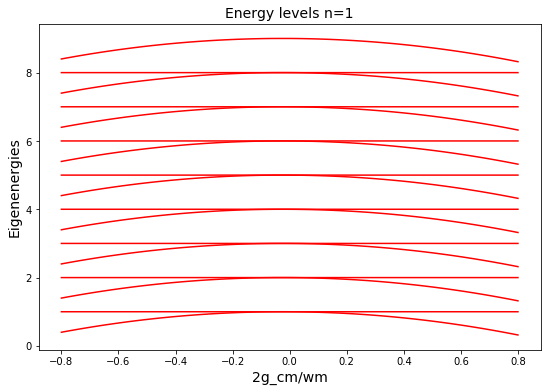

In [36]:
######################################
######################################

fig, ax = plt.subplots(1,1, figsize=(9,6))


#for n in range(len(g_aclist)):
    
for m in range(1,18):     # range(7)
        
    #ax.plot(g_aclist , ( E_Gf[:,m]), 'b')    
    ax.plot(2*g_list/omega , ((evals_mt[:,m]-evals_mt[:,0])/omega), 'r')

    
#plt.xlim([1, 2])   # defult range is [0,1], no need to define this!

#ax.set_ylim([6.7,7.95])

#ax.legend(('xy','vt'))
ax.set_xlabel('2g_cm/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=1',fontsize=(14));
# plt.axis([0, 12, 900, 2500])     # [xmin, xmax, ymin, ymax]

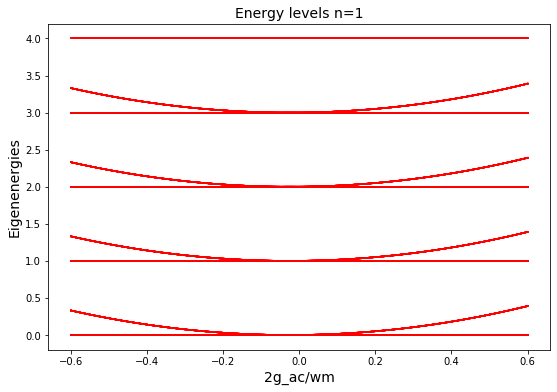

In [185]:
######################################
######################################

fig, ax = plt.subplots(1,1, figsize=(9,6))


#for n in range(len(g_aclist)):
    
for m in range(1,99):     # range(7)
        
    #ax.plot(g_aclist , ( E_Gf[:,m]), 'b')    
    ax.plot(2*g_list/wm , ((evals_mt[:,m]-evals_mt[:,0])/omega), 'r')

    
#plt.xlim([1, 2])   # defult range is [0,1], no need to define this!

#ax.set_ylim([6.7,7.95])

#ax.legend(('xy','vt'))
ax.set_xlabel('2g_ac/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=1',fontsize=(14));
# plt.axis([0, 12, 900, 2500])     # [xmin, xmax, ymin, ymax]


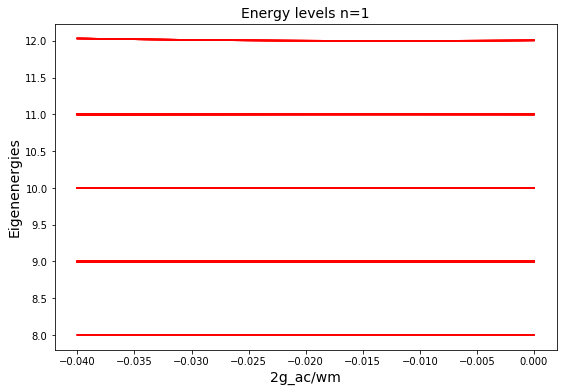

In [14]:
fig, ax = plt.subplots(1,1, figsize=(9,6))


#for n in range(len(g_aclist)):
    
for m in range(200,283):     # range(7)
        
    #ax.plot(g_aclist , ( E_Gf[:,m]), 'b')    
    ax.plot(g_list , ((estates[:,m]-estates[:,0])/omega), 'r')

    
#plt.xlim([1, 2])   # defult range is [0,1], no need to define this!
# OR
#ax.set_ylim([6.7,7.95])
#ax.set_xlim([0,12])
#ax.legend(('xy','vt'))
ax.set_xlabel('2g_ac/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=1',fontsize=(14));
# plt.axis([0, 12, 900, 2500])     # [xmin, xmax, ymin, ymax]
#ax[1].set_xlabel('arbitrary',fontsize=14)
#ax[1].set_ylabel('Eigenenergies',fontsize=(14))
#ax[1].set_title('A two-level system coupled to a cavity',fontsize=(14));

In [113]:
#----------------parameters
Nc = 8;      #### photons ##
Nm = 8;     ## phonon dimension  

wm = 1.0                   #  mechanical frequency
wc = 100 * wm                  # cavity frequency.... 
wa = wc                      # resonance case
#g_ac = wm/2.0               # atom-cavity coupling strength
g_cm = 0.1 * wm               # cavity-resonator coupling
g_am = - wm/40.0       # atom_phonon coupling 

delta_ac = wa - wc        # atom-cavity detuning 

a = tensor(qeye(Nm),destroy(Nc), qeye(2))     # cavity anihilation operator
b = tensor(destroy(Nm),qeye(Nc), qeye(2))      # phonon anihilation opr

#sigma_z = tensor(qeye(Nm), qeye(Nc), sigmaz())
#sigma_p = tensor(qeye(Nm), qeye(Nc), sigmap())  # raising and lowering ops for atom
#sigma_m = tensor(qeye(Nm), qeye(Nc), sigmam())

sigma_m = tensor(qeye(Nm), qeye(Nc), destroy(2))
sigma_p = sigma_m.dag()  # raising and lowering ops for atom
sigma_z = sigma_p*sigma_m-sigma_m*sigma_p

g_aclist = np.linspace(0,2.5,60) *wm/2.0         # g_ac range 
evals_mat = np.zeros((len(g_aclist),2*Nc*Nm))

n=1
idx = 0
for g_ac in g_aclist:
   
    H = wc * a.dag() * a + wa * sigma_z/2 + wm * b.dag() * b + 1j *  g_ac * (sigma_p * a - sigma_m * a.dag()) -\
        g_cm * a.dag()* a * (b.dag() + b) - g_am * sigma_z * (b.dag() + b)
                        
    #evals, ekets = H.eigenstates()
    evals = H.eigenenergies()
    evals_mat[idx,:] = np.real(evals)
    
    idx +=1
H

Quantum object: dims = [[8, 8, 2], [8, 8, 2]], shape = (128, 128), type = oper, isherm = True
Qobj data =
[[-50.+0.j           0.+0.j           0.+0.j         ...   0.+0.j
    0.+0.j           0.+0.j        ]
 [  0.+0.j          50.+0.j           0.+1.25j       ...   0.+0.j
    0.+0.j           0.+0.j        ]
 [  0.+0.j           0.-1.25j        50.+0.j         ...   0.+0.j
    0.+0.j           0.+0.j        ]
 ...
 [  0.+0.j           0.+0.j           0.+0.j         ... 657.+0.j
    0.+3.30718914j   0.+0.j        ]
 [  0.+0.j           0.+0.j           0.+0.j         ...   0.-3.30718914j
  657.+0.j           0.+0.j        ]
 [  0.+0.j           0.+0.j           0.+0.j         ...   0.+0.j
    0.+0.j         757.+0.j        ]]

In [114]:
len(evals_mat)
#len(evals[:,1])
evals_mat[:,66]
g_aclist

array([0.        , 0.02118644, 0.04237288, 0.06355932, 0.08474576,
       0.1059322 , 0.12711864, 0.14830508, 0.16949153, 0.19067797,
       0.21186441, 0.23305085, 0.25423729, 0.27542373, 0.29661017,
       0.31779661, 0.33898305, 0.36016949, 0.38135593, 0.40254237,
       0.42372881, 0.44491525, 0.46610169, 0.48728814, 0.50847458,
       0.52966102, 0.55084746, 0.5720339 , 0.59322034, 0.61440678,
       0.63559322, 0.65677966, 0.6779661 , 0.69915254, 0.72033898,
       0.74152542, 0.76271186, 0.78389831, 0.80508475, 0.82627119,
       0.84745763, 0.86864407, 0.88983051, 0.91101695, 0.93220339,
       0.95338983, 0.97457627, 0.99576271, 1.01694915, 1.03813559,
       1.05932203, 1.08050847, 1.10169492, 1.12288136, 1.1440678 ,
       1.16525424, 1.18644068, 1.20762712, 1.22881356, 1.25      ])

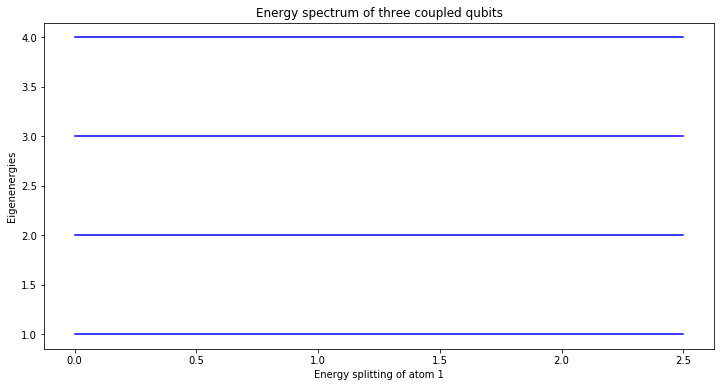

In [115]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(1,5):
    ax.plot(2*g_aclist / (wm), (evals_mat[:,n]-evals_mat[:,0]), 'b')

ax.set_xlabel('Energy splitting of atom 1')
ax.set_ylabel('Eigenenergies')
#ax.set_ylim([-10,0])

ax.set_title('Energy spectrum of three coupled qubits');

In [47]:
Nc = 5     # cavity photon number
Nm = 5    # mechanical phonon number 

#wm= omega     
wm=1
wc = 100 *wm
wa= wc

omega= wm
delta_ac = wa- wc

n= 1 #1.0

g_cm = omega/20.0         # cavity-phonon coupling
g_am = - omega/40.0       # atom_phonon coupling 
g_ac = omega /2.0         # cavity-atom coupling
g_polr= g_cm- 2* g_am # wm/10.0

b = tensor(qeye(Nc),destroy(Nm),qeye(2))

sigma_x = tensor(qeye(Nc),qeye(Nm), sigmax())
sigma_z = tensor(qeye(Nc),qeye(Nm), sigmaz())
I = tensor(qeye(Nc),qeye(Nm),qeye(2))

###### theta
if delta_ac !=0:
    theta = np.arctan(2*sqrt(n)*g_ac/delta_ac)
else:
    theta = pi/2.0

# displaced frame
q_0 = (n-1/2)*g_cm*sqrt(2)/wm
b_n = b - q_0/sqrt(2)


In [48]:
I


Quantum object: dims = [[5, 5, 2], [5, 5, 2]], shape = (50, 50), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

In [49]:
#writing eq. 5
a_0 = (n-1/2) * wc - wm * ((n-1/2) * (g_cm/wm))**2
g_aclist = np.linspace(0,2.5,80) * g_ac

idx=0
evals_mt = np.zeros((len(g_aclist), Nc*Nm*2))
for g_ac in g_aclist:
    
    H_n = I* a_0  + sqrt(n*(g_ac**2) + (delta_ac**2)/4) * sigma_z \
    + wm * b_n.dag() * b_n - (1/2 * g_polr) * (b_n.dag() + b_n - 2* (n-1/2) *g_cm/wm ) \
    * (cos(theta) * sigma_z + sin(theta) * sigma_x) 
    
    evals, ekets = H_n.eigenstates()
    evals_mt[idx,:] = np.real(evals)
    idx += 1


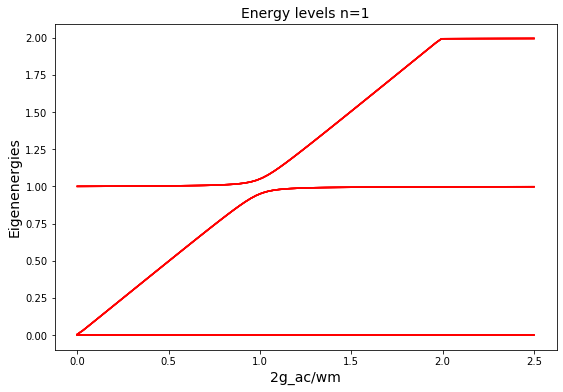

In [50]:
######################################
######################################

fig, ax = plt.subplots(1,1, figsize=(9,6))
    
for m in range(1,15):     # range(7)
        ax.plot(2*g_aclist/wm , ((evals_mt[:,m]-evals_mt[:,0])/omega), 'r')

#ax.legend(('xy','vt'))
ax.set_xlabel('2g_ac/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=1',fontsize=(14));
# plt.axis([0, 12, 900, 2500])     # [xmin, xmax, ymin, ymax]

In [58]:
wc+2*wm

12.5